In [24]:
# Data Manipulation and Computation
import numpy as np
import pandas as pd

# Financial Data
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

# Statistical Analysis
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning (Regression)
from sklearn.linear_model import LinearRegression


In [2]:
ticker = yf.Ticker("EURUSD=X")

data = ticker.history()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-30 00:00:00+01:00,1.116982,1.120838,1.113611,1.116982,0,0,0
2024-10-01 00:00:00+01:00,1.113660,1.114579,1.106109,1.113660,0,0,0
2024-10-02 00:00:00+01:00,1.106390,1.108217,1.103412,1.106390,0,0,0
2024-10-03 00:00:00+01:00,1.104850,1.104850,1.100958,1.104850,0,0,0
2024-10-04 00:00:00+01:00,1.103558,1.103997,1.095614,1.103558,0,0,0


## Straight line Method

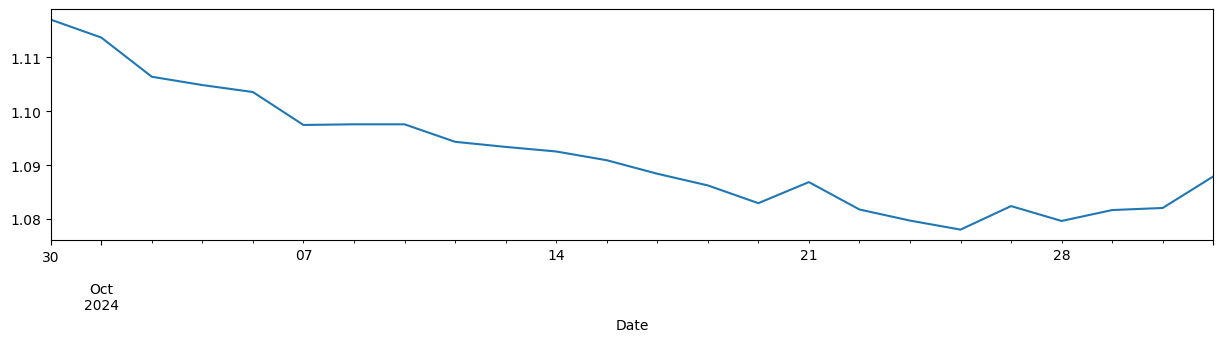

In [3]:
data.Close.plot(figsize=(15,3))
plt.show()

In [5]:
x = data.index.map(lambda date: date.toordinal())  # Convert dates to ordinal integers
y = data['Close'].values 
slp,intercept,_,_,_ = stats.linregress(x=x,y=y)

slp

-0.0010135545837345408

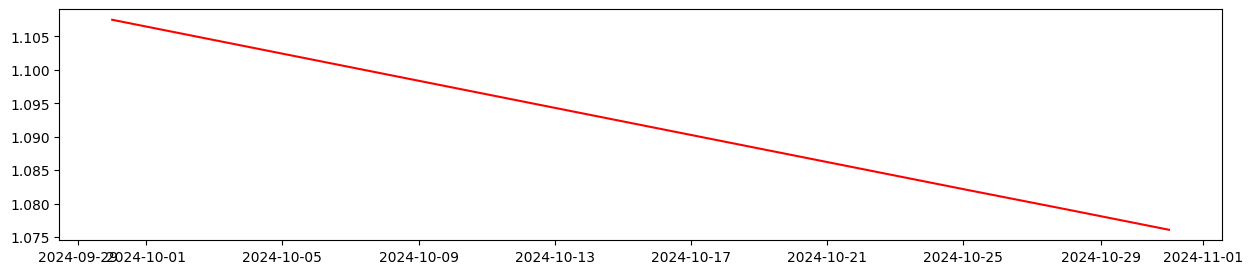

In [6]:
regression_line = slp * x + intercept
plt.figure(figsize=(15,3))
plt.plot(data.index, regression_line, color='red', label='Trend Line')

plt.show()

In [7]:
data2 = data.copy()
data2.reset_index(inplace=True)
data2['date'] =[i for i in range(len(data2.Date.astype(str)))]
model = ols('Close~date',data=data2).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     112.2
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           4.19e-10
Time:                        18:31:46   Log-Likelihood:                 96.451
No. Observations:                  24   AIC:                            -188.9
Df Residuals:                      22   BIC:                            -186.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1083      0.002    616.364      0.000       1.105       1.112
date          -0.0014      0.000    -10.593      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        8.846   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.808
Skew:                           1.219   Prob(JB):                       0.0332
Kurtosis:                       3.927   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

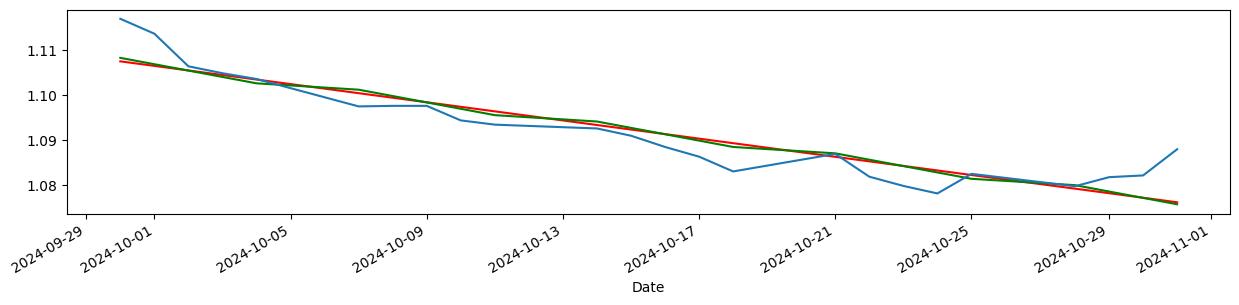

In [9]:


# Plot the regression line
plt.plot(data.index, regression_line, color='red', label='Trend Line')
plt.plot(data.index,model.predict(data2.date),color='green', label='Trend Line2')
data.Close.plot(figsize=(15,3))

plt.show()


## MA

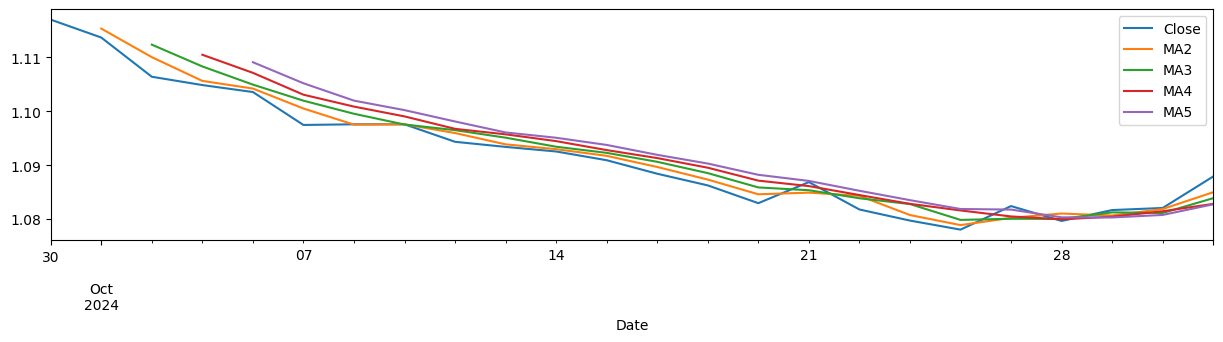

In [10]:
data.Close.plot(figsize=(15,3))
for i in range(2,6):
    data.Close.rolling(i).mean().plot(figsize=(15,3),label=f'MA{i}')


plt.legend()
plt.show()

## MLR

In [30]:
mlr = LinearRegression()

Y = data['Close']
X = data[['Open','High','Low']]
mlr.fit(X,Y)

LinearRegression()

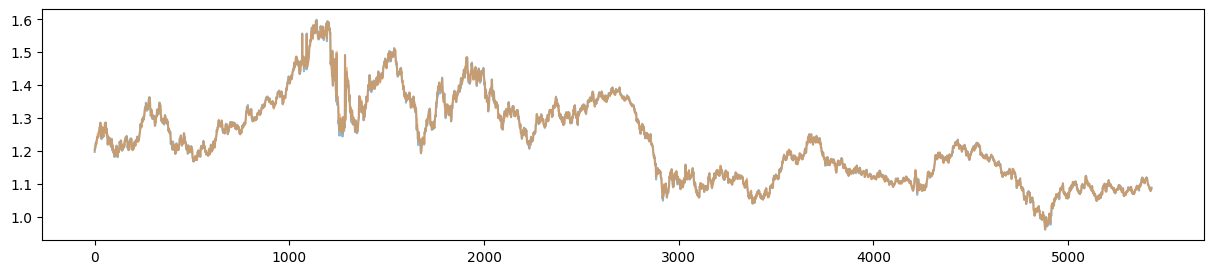

In [37]:
Y.reset_index(drop=True).plot(figsize=(15,3),alpha=.5)
plt.plot(mlr.predict(X),alpha=.5)

plt.show()

In [36]:
mlr.coef_

array([0.41117878, 0.56548182, 0.0197053 ])

## Components

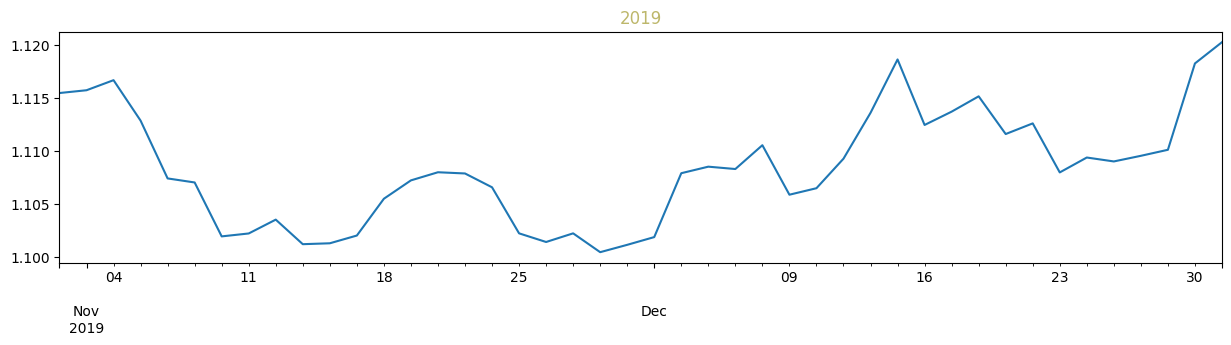

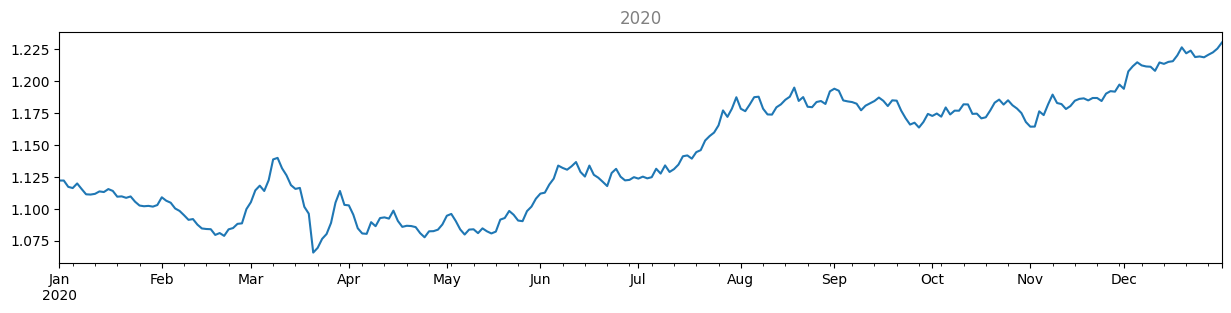

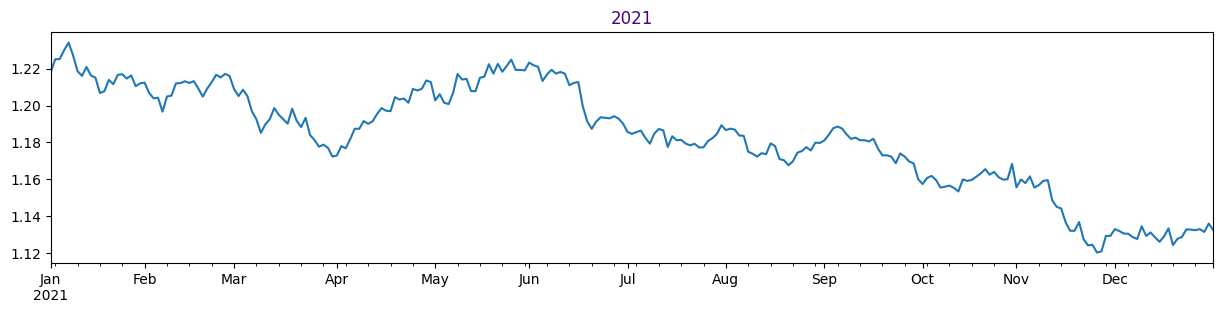

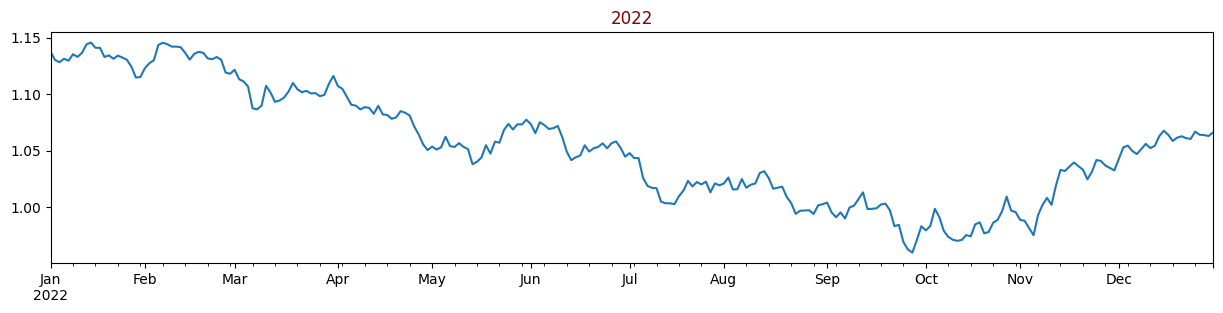

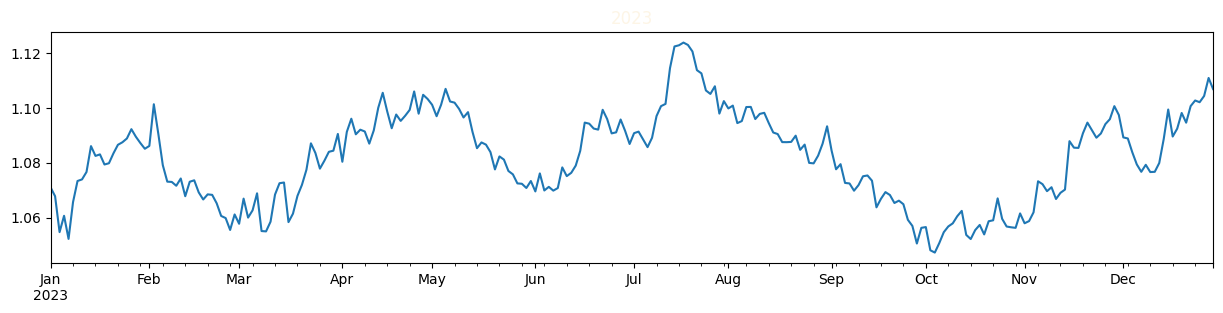

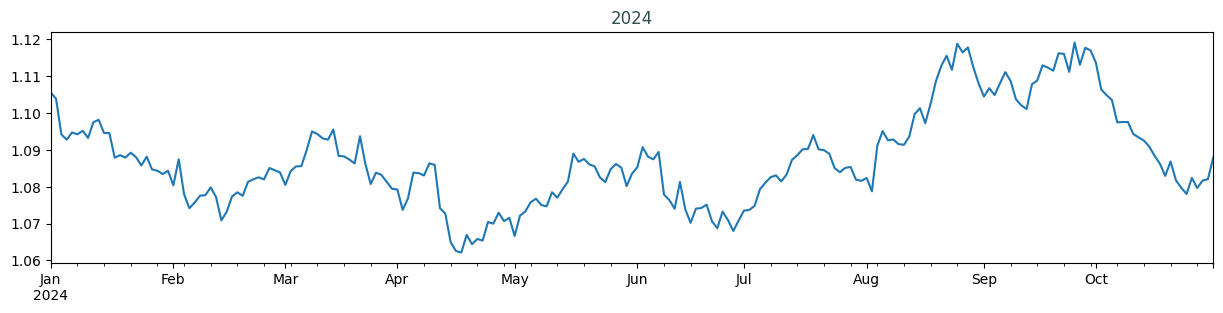

In [11]:
data = ticker.history(period='5y')
colors = list(mpl.colors.cnames.values())
years = data.index.year.unique().to_list()
for ind,year in enumerate(years):
    data[data.index.year==year]['Close'].plot(figsize=(15,3))
    plt.title(year,color=np.random.choice(colors))
    plt.xlabel('')
    plt.show()

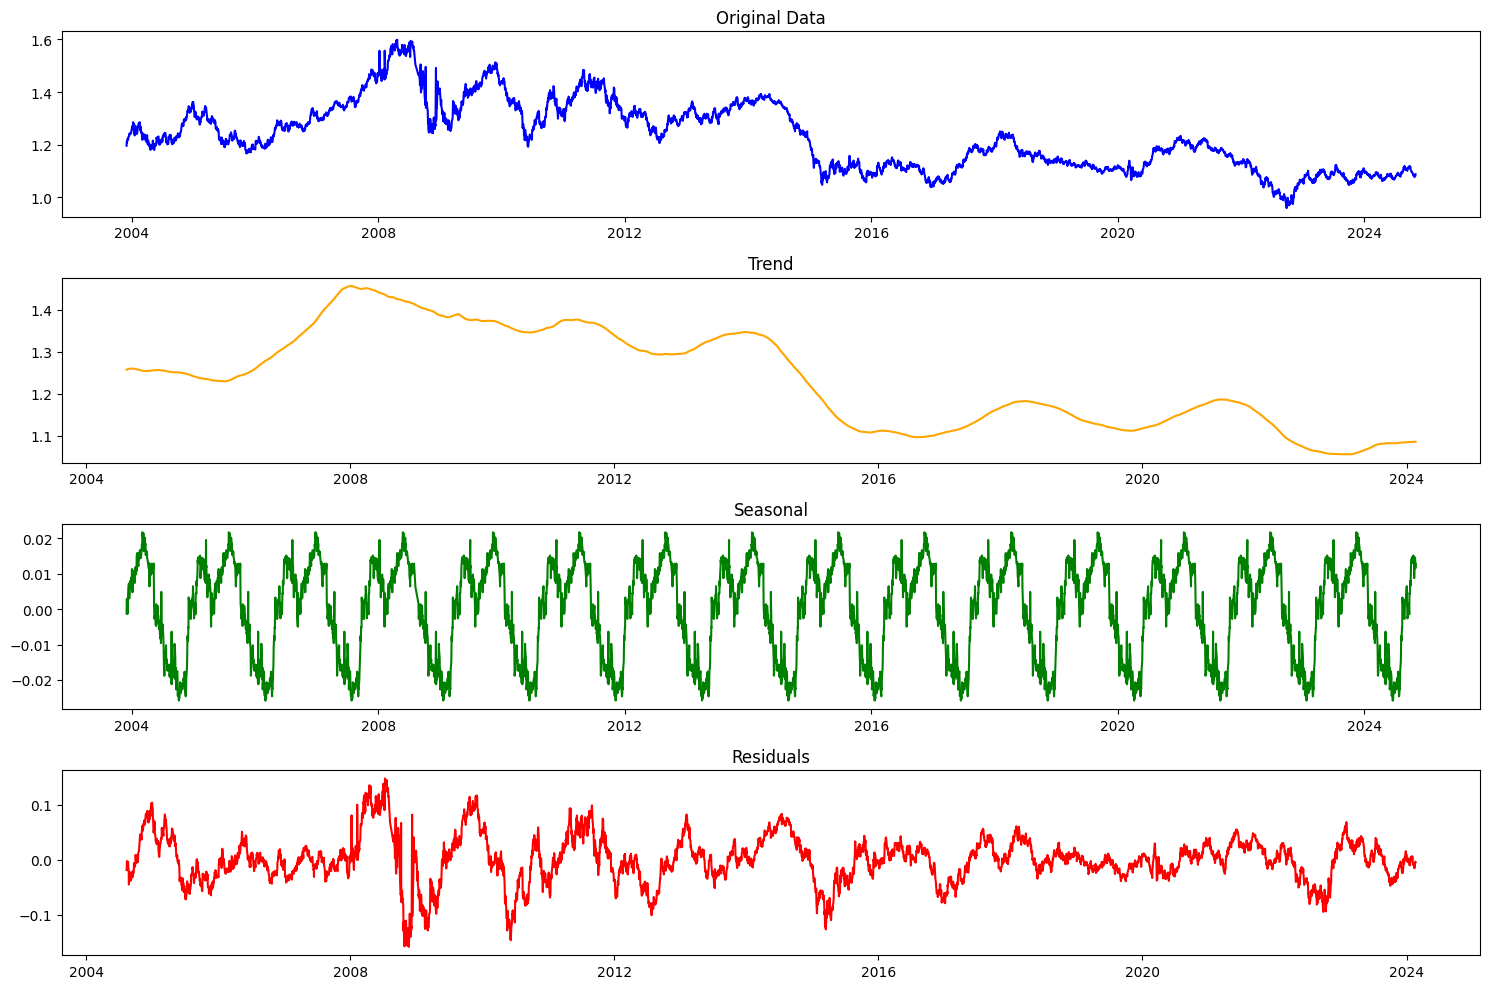

In [38]:


# Fetch the data
ticker = yf.Ticker("EURUSD=X")
data = ticker.history(period='max')

# Perform seasonal decomposition (using additive model)
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)

# Plot each component
plt.figure(figsize=(15, 10))

# Original data
plt.subplot(4, 1, 1)
plt.plot(data['Close'], color='blue')
plt.title('Original Data')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, color='orange')
plt.title('Trend')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, color='green')
plt.title('Seasonal')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Plotting each year's data with random colors and titles for illustration
colors = list(mpl.colors.cnames.values())
years = data.index.year.unique().to_list()

# for ind, year in enumerate(years):
#     plt.figure(figsize=(15, 3))
#     color_choice = np.random.choice(colors)
#     data[data.index.year == year]['Close'].plot(color=color_choice)
#     plt.title(f'{year}', color=color_choice)
#     plt.xlabel('')
#     plt.show()


## Stationary

In [13]:
data = ticker.history(duration='max',period='max')

<Axes: xlabel='Date'>

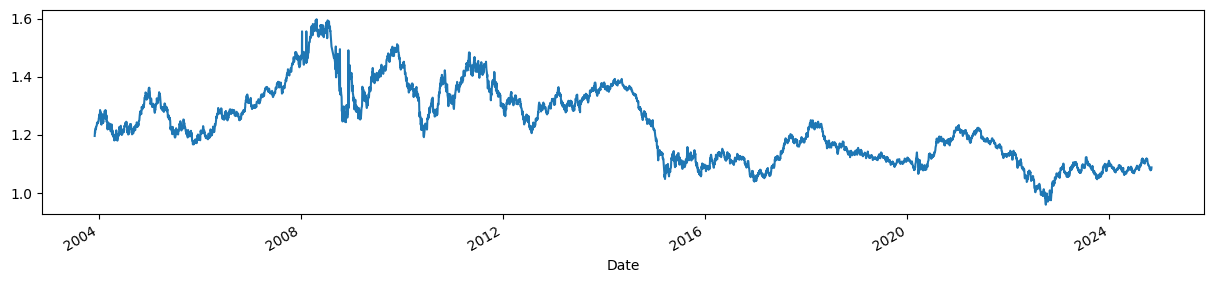

In [14]:
data.Close.plot(figsize=(15,3))

In [15]:
import statsmodels as sm

In [21]:
adf,p,_,_,_,_=adfuller(data.Close)
p

0.34313873212371054

In [22]:
adf,p,_,_,_,_ = adfuller(data.Close.diff().dropna())
p

1.8794667096318093e-25

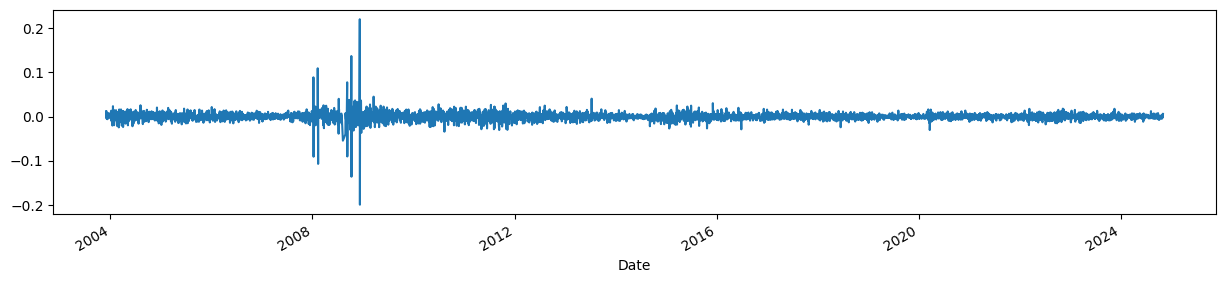

In [23]:
data.Close.diff().plot(figsize=(15,3))
plt.show()